# 선형 회귀 (Linear Regression)

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 보스턴 집값 예측 데이터 
각 데이터베이스의 레코드는 보스턴 교외 또는 마을을 설명한다.

이 데이터는 1970년 보스턴 표준 도시 통계 지역(SMSA)에서 수집되었다. (UCI ML Repositor에서 발췌):

- CRIM: 마을별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
- INDUS: 비소매 업종이 차지하는 마을별 비율
- CHAS: 찰스강 더미 변수 (강과 인접한 지역이면 1, 아니면 0)
- NOX: 질소 산화물 농도 (1,000만분의 1 단위)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 소유 주택 비율
- DIS: 보스턴 고용 센터 5곳까지의 가중 거리
- RAD: 방사형 고속도로 접근성 지수
- TAX: \$10,000당 전체 재산세율
- PTRATIO: 마을별 학생-교사 비율
- B: $1000(Bk−0.63)^2$ (여기서 Bk는 마을별 흑인 비율)
- LSTAT: 저소득층 인구 비율
- MEDV: (타겟) Median House Value 자가 소유 주택의 중앙값 (단위: \$1000s)

In [112]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [113]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [114]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

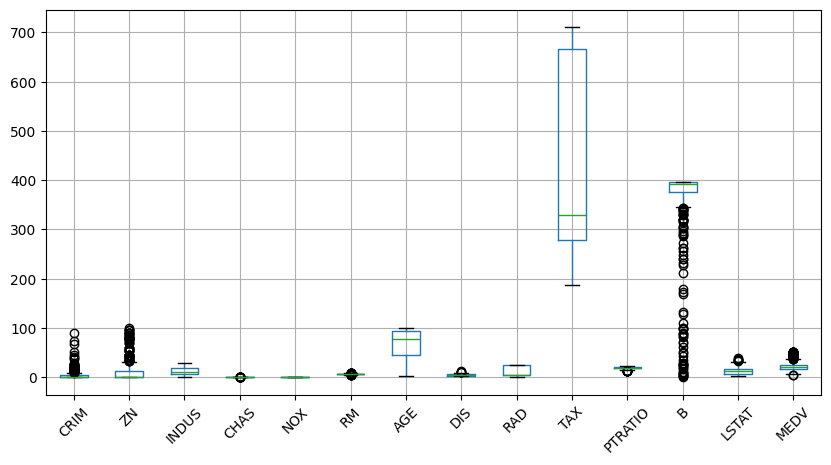

In [115]:
# 전체 특성에 대해서 박스플롯 그리기

boston_df.boxplot()
plt.xticks(rotation=45)
plt.show()

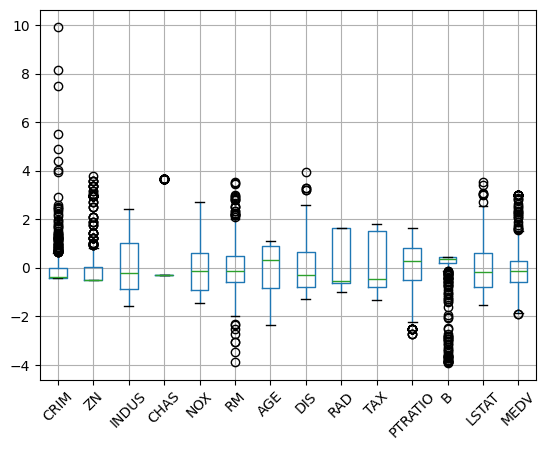

In [116]:
# 각 특성을 표준화 해서 시각화하여 boxplot 그리기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
boston_df_scaled = scaler.fit_transform(boston_df)
boston_df_scaled = pd.DataFrame(boston_df_scaled, columns=boston_df.columns)
boston_df_scaled.boxplot()
plt.xticks(rotation=45)
plt.show()


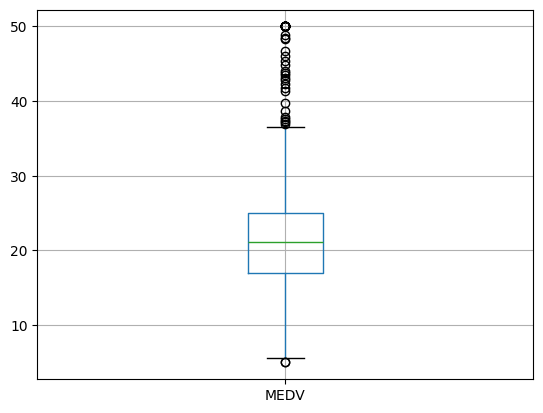

In [117]:
boston_df.boxplot(column='MEDV')
plt.show()

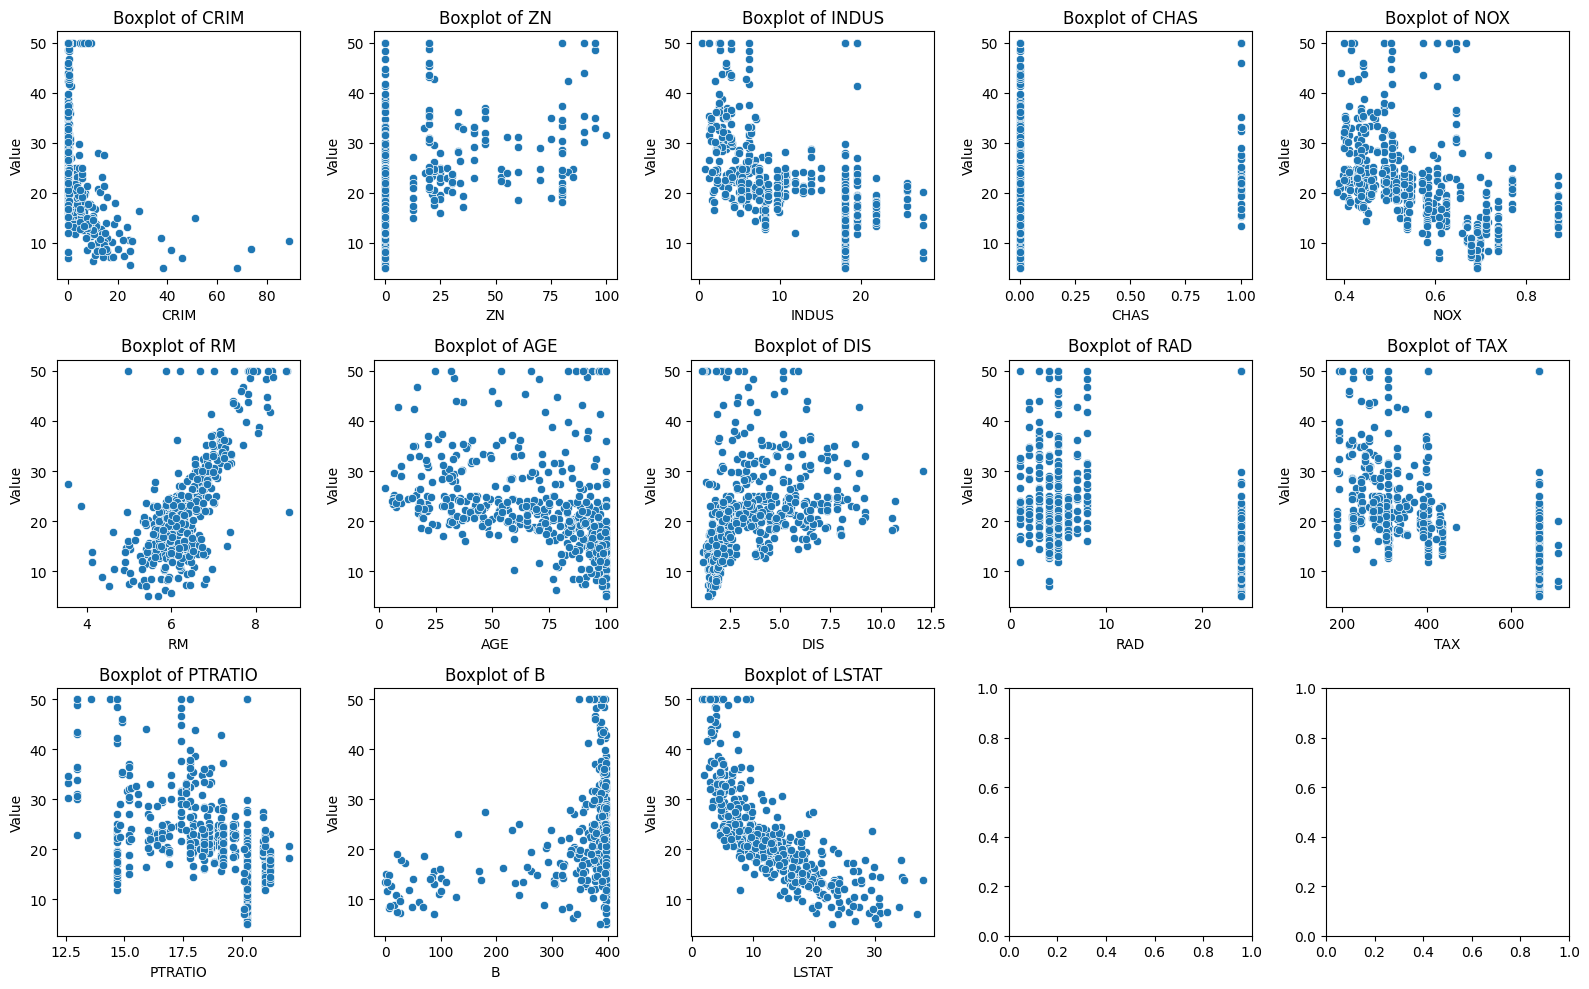

In [118]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, col_name in enumerate(columns):
    row, col = divmod(i, 5)
    sns.scatterplot(x=col_name, y='MEDV', data=boston_df, ax=ax[row][col])
    ax[row][col].set_title(f'Boxplot of {col_name}')
    ax[row][col].set_xlabel(col_name)
    ax[row][col].set_ylabel('Value')
plt.tight_layout()
plt.show()

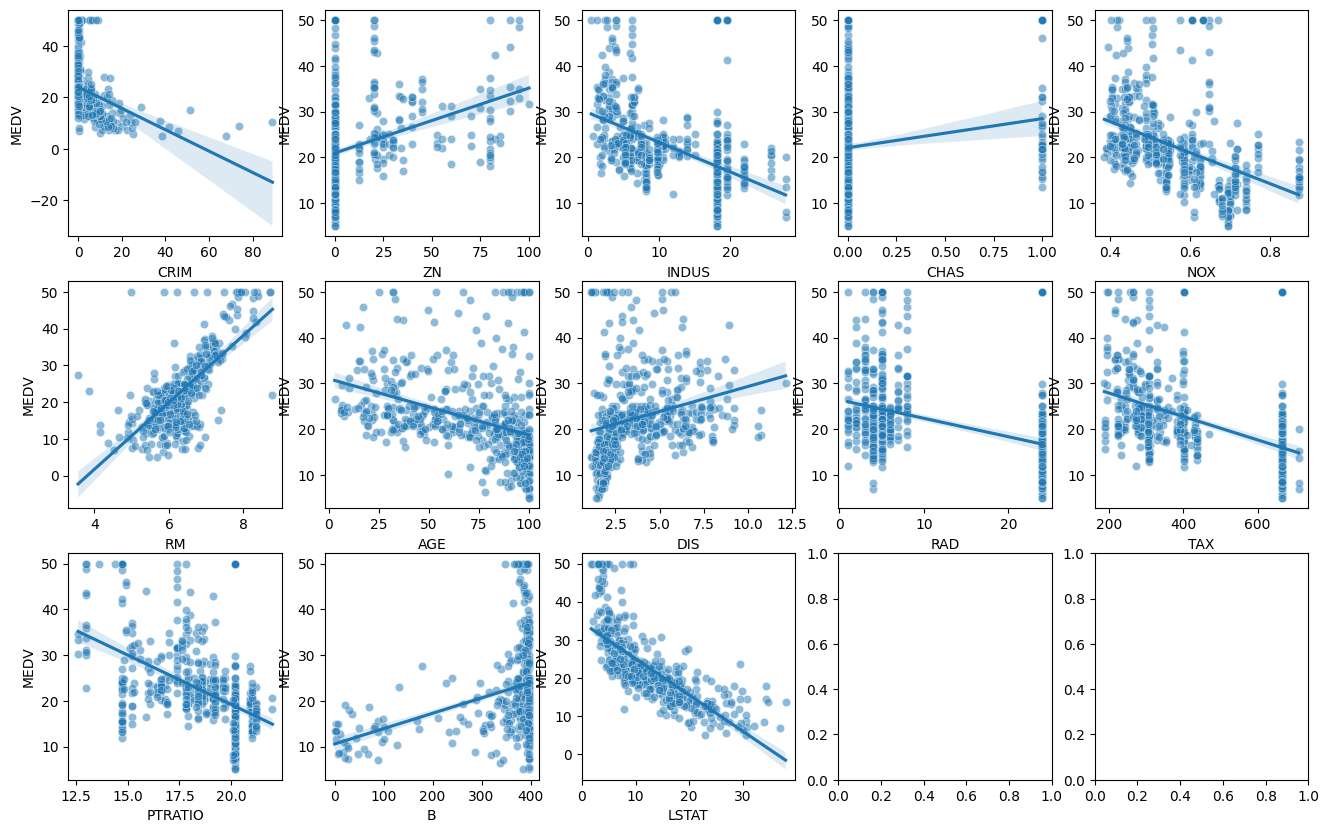

In [119]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, col_name in enumerate(columns):
    row, col = divmod(i, 5)
    ax_temp = ax[row][col]
    
    sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp, alpha=0.5)
    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp, scatter=False)
plt.show()

$$ y = w1x1 + w2x2 + w3x3 + ... + w13x13 + b $$

In [120]:
# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

# 입력-라벨 데이터 분리
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [121]:
# Linear Regression 모델 적용
from sklearn.linear_model import LinearRegression

# 모델 생성
lr = LinearRegression()

# 모델 학습
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
# 모델 평가 -> score 기본 평가 지표: R^2(결정계수)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.748087259862344, 0.684426728352709)

In [123]:
# 모델 예측
y_pred = lr.predict(X_test)

In [124]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    
evaluate_regression(y_test, y_pred)
print(lr.coef_, lr.intercept_)
# MSE, RMSE, MAE, R^2 평가 지표 출력
# 모델 예측과 실제 데이터 비교 분석 결과 시각화

MSE: 22.0987, RMSE: 4.7009, MAE: 3.0609, R^2: 0.6844
[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01] 29.83642016383845


In [125]:
print(boston_df.columns)
print(lr.coef_)
print(lr.intercept_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
29.83642016383845


In [126]:
# map과 zip을 사용할 때, lr.coef_의 값은 float이기 때문에 문자열로 변환이 필요합니다.
# 그리고 원하는 출력 형태는 "컬럼명 : 계수"이므로 아래와 같이 작성하면 됩니다.

result = map(lambda x: f"{x[0]} : {x[1]:.8f}", zip(boston_df.columns, lr.coef_))
for r in result:
    print(r)
print(f"intercept_ : {lr.intercept_:.8f}")

CRIM : -0.12832264
ZN : 0.02955178
INDUS : 0.04885909
CHAS : 2.77350326
NOX : -16.23882915
RM : 4.36875476
AGE : -0.00924808
DIS : -1.40086668
RAD : 0.25776124
TAX : -0.00995695
PTRATIO : -0.92312294
B : 0.01318542
LSTAT : -0.51763952
intercept_ : 29.83642016


In [127]:
# 모델 예측과 실제 데이터 비교 분석 결과 시각화
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

# 다항회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 기법

In [128]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape, X_train_poly.shape, X_test.shape, X_test_poly.shape)

print(poly.get_feature_names_out())

(379, 13) (379, 104) (127, 13) (127, 104)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'CRIM^2' 'CRIM ZN' 'CRIM INDUS' 'CRIM CHAS' 'CRIM NOX'
 'CRIM RM' 'CRIM AGE' 'CRIM DIS' 'CRIM RAD' 'CRIM TAX' 'CRIM PTRATIO'
 'CRIM B' 'CRIM LSTAT' 'ZN^2' 'ZN INDUS' 'ZN CHAS' 'ZN NOX' 'ZN RM'
 'ZN AGE' 'ZN DIS' 'ZN RAD' 'ZN TAX' 'ZN PTRATIO' 'ZN B' 'ZN LSTAT'
 'INDUS^2' 'INDUS CHAS' 'INDUS NOX' 'INDUS RM' 'INDUS AGE' 'INDUS DIS'
 'INDUS RAD' 'INDUS TAX' 'INDUS PTRATIO' 'INDUS B' 'INDUS LSTAT' 'CHAS^2'
 'CHAS NOX' 'CHAS RM' 'CHAS AGE' 'CHAS DIS' 'CHAS RAD' 'CHAS TAX'
 'CHAS PTRATIO' 'CHAS B' 'CHAS LSTAT' 'NOX^2' 'NOX RM' 'NOX AGE' 'NOX DIS'
 'NOX RAD' 'NOX TAX' 'NOX PTRATIO' 'NOX B' 'NOX LSTAT' 'RM^2' 'RM AGE'
 'RM DIS' 'RM RAD' 'RM TAX' 'RM PTRATIO' 'RM B' 'RM LSTAT' 'AGE^2'
 'AGE DIS' 'AGE RAD' 'AGE TAX' 'AGE PTRATIO' 'AGE B' 'AGE LSTAT' 'DIS^2'
 'DIS RAD' 'DIS TAX' 'DIS PTRATIO' 'DIS B' 'DIS LSTAT' 'RAD^2' 'RAD TAX'
 'RAD PTRATIO' 'RAD B' 'RAD LSTAT' 'TAX^2

In [129]:
# 학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
########################################################################################################
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    
evaluate_regression(y_test, y_pred)
print(lr.coef_, lr.intercept_)
# MSE, RMSE, MAE, R^2 평가 지표 출력
# 모델 예측과 실제 데이터 비교 분석 결과 시각화


# 학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
# 평가
lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test)

# 평가 지표
y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)

MSE: 22.0987, RMSE: 4.7009, MAE: 3.0609, R^2: 0.6844
[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01] 29.83642016383845
MSE: 15.6974, RMSE: 3.9620, MAE: 2.5832, R^2: 0.7758


In [131]:
# 평가
lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test)

(0.9448313975211595, 0.7758378393362159)

In [132]:
# 평가 지표
y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)

MSE: 15.6974, RMSE: 3.9620, MAE: 2.5832, R^2: 0.7758


In [133]:
MSE: 22.0987, RMSE: 4.7009, MAE: 3.0609, R^2: 0.6844

SyntaxError: invalid syntax (839075611.py, line 1)

In [ ]:
##### 과대적합/과소적합 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

---

<과제>

**California Housing Dataset**는 머신러닝과 데이터 분석에서 자주 사용되는 데이터셋으로, 1990년 미국 캘리포니아 주의 인구 조사를 기반으로 수집된 주택 관련 데이터이다. 이 데이터셋은 캘리포니아 내의 블록 그룹(block group)을 나타내며, 각 레코드는 하나의 블록 그룹을 의미한다. 블록 그룹은 미국 인구 조사국에서 표본 데이터를 제공하는 가장 작은 지리적 단위이다.
- 데이터셋은 **20,640개의 레코드**로 구성되어 있다.
- **회귀 모델링**: 주택 가격 예측.
- **탐색적 데이터 분석(EDA)**: 주택 특징 간의 관계 분석.
- **특징 엔지니어링 및 선택**: 영향력 있는 특징 도출.


**특징**

1. **MedInc**: 블록 그룹 내의 중간 소득 (단위: 만 달러).
2. **HouseAge**: 블록 그룹 내의 중간 주택 연수.
3. **AveRooms**: 블록 그룹 내 가구당 평균 방 수.
4. **AveBedrms**: 블록 그룹 내 가구당 평균 침실 수.
5. **Population**: 블록 그룹 내 인구 수.
6. **AveOccup**: 블록 그룹 내 가구당 평균 거주자 수.
7. **Latitude**: 블록 그룹의 위도.
8. **Longitude**: 블록 그룹의 경도.

**목표 변수**

- **MedHouseVal**: 블록 그룹 내 가구의 중간 주택 가치 (단위: 만 달러).


In [145]:
# 캘리포니아 집값 데이터 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

california_data = fetch_california_housing()
california_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [146]:
california_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [147]:
# DataFrame 생성 -> 구조, 기초 통계 

# fetch_california_housing()의 'data'와 'feature_names'를 사용해서 DataFrame 생성성
df = pd.DataFrame(california_data.data, columns=california_data.feature_names)
df['MedHouseVal'] = california_data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [148]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


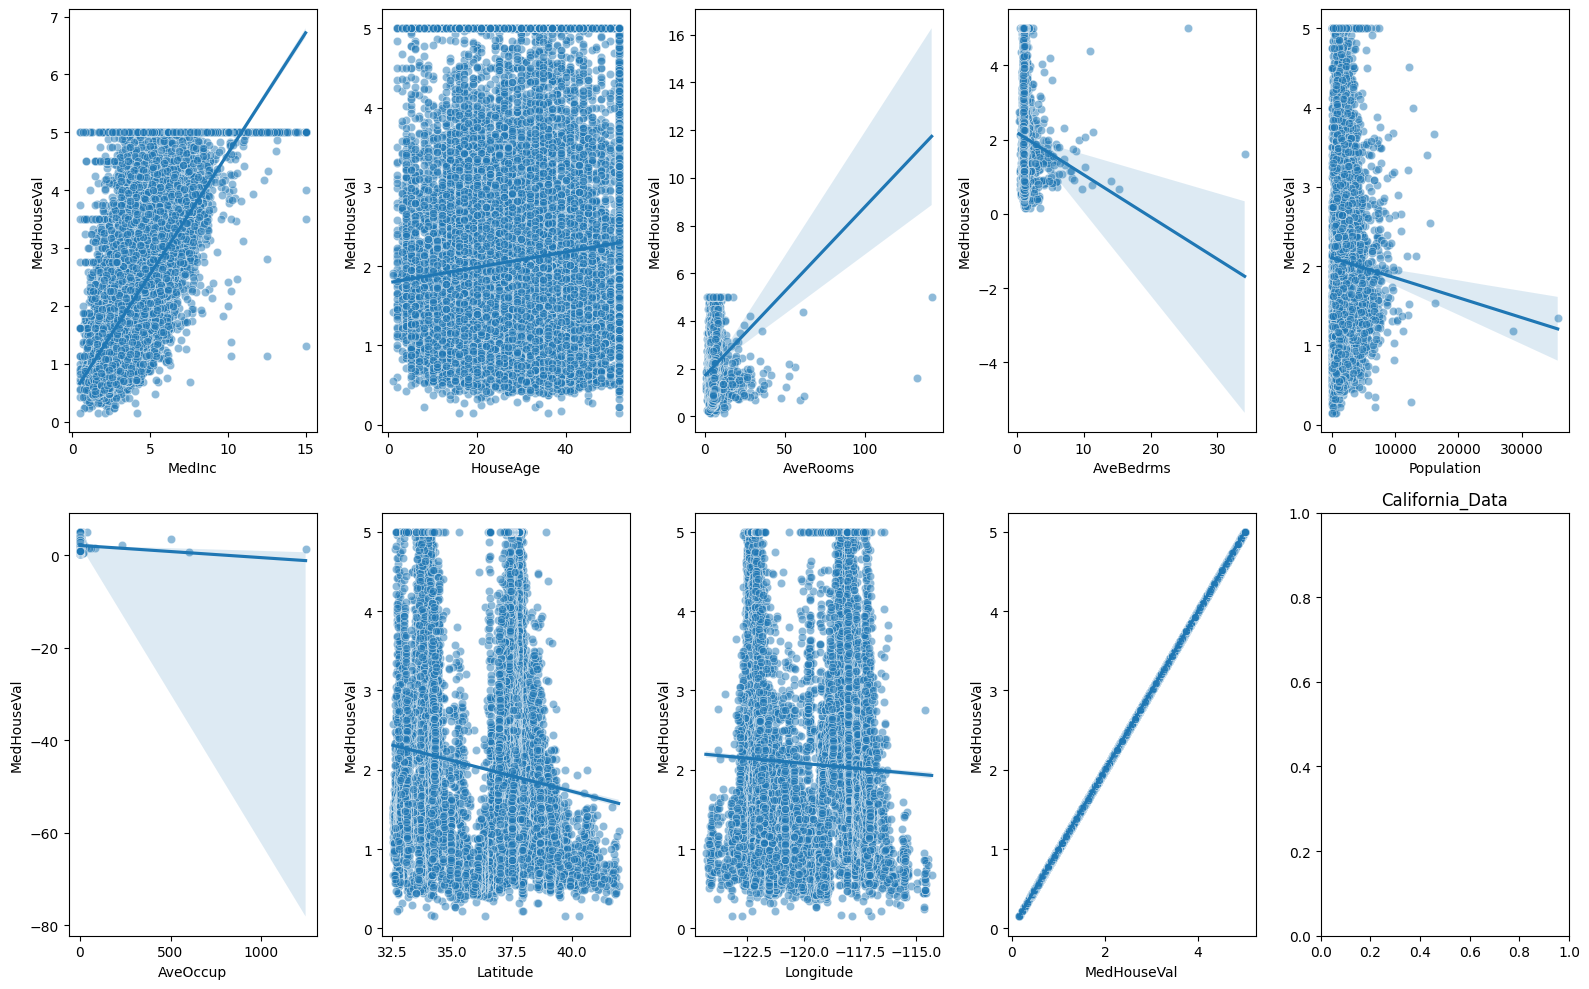

In [149]:
# 시각화 -> 특성 확인 regplot 
columns = df.columns.values # ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=2)

for i, col_name in enumerate(columns):
    row, col = divmod(i, 5)
    ax_temp = ax[row][col]

    sns.scatterplot(data=df, x=col_name, y='MedHouseVal', ax=ax_temp, alpha=0.5)
    sns.regplot(data=df, x=col_name, y='MedHouseVal', ax=ax_temp, scatter=False)

plt.title('California_Data')
plt.tight_layout()
plt.show()

In [150]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [151]:
# 다중회귀 (훈련, 평가, 다른 평가 지표들로 평가)

# 데이터 X: Feature, y : label 분리
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']
# X.shape, y.shape (20640, 8), (20640,)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터를 훈련 세트와 테스트 세트로 분리 (X: Feature, Y: label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (회귀 모델 성능 향상에 도움)
scaler = StandardScaler()                           # 훈련의 일관성을 위해 target인 y 데이터는 스케일링하지 않음.
X_train_scaled = scaler.fit_transform(X_train)      # X 훈련 데이터 스케일링
X_test_scaled = scaler.transform(X_test)            # X 테스트 데이터 스케일링 

# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
# lr.transform(X_test, y_test)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [154]:
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.6125511913966952, 0.5757877060324508)

In [ ]:
########################################################################################################
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    
evaluate_regression(y_test, y_pred)
print(lr.coef_, lr.intercept_)
# MSE, RMSE, MAE, R^2 평가 지표 출력
# 모델 예측과 실제 데이터 비교 분석 결과 시각화


# 학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
# 평가
lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test)

# 평가 지표
y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)

In [ ]:
# 다항회귀 (훈련, 평가, 다른 평가 지표들로 평가) 